# Netcon report module
This module was written to help with the analysis of complex netcon reports generated by BMTK. Some example reports could look like 
```json
{
    "reports": {
        "syn_report": {
            "cells": "all",
            "variable_name": "tau_r_AMPA",
            "module": "netcon_report",
            "sections": "all",
            "syn_type": "AMPA_NMDA_STP",
            "file_name": "syn_test1.h5",
            "start_time": 0,
            "dt": 5
        },
        "syn_report2": {
            "cells": {
                "node_ids": [1,2,3,4,5]
            },
            "variable_name": "tau_r_AMPA",
            "module": "netcon_report",
            "sections": "all",
            "syn_type": "AMPA_NMDA_STP",
            "file_name": "syn_test2.h5",
            "start_time": 0,
            "dt": 5
        },
        "syn_report3": {
            "cells": {
                "pop_name": "CS"
            },
            "variable_name": "tau_r_AMPA",
            "module": "netcon_report",
            "sections": "all",
            "syn_type": "AMPA_NMDA_STP",
            "file_name": "syn_test3.h5",
            "start_time": 0,
            "dt": 5
        }
    }
}
```

In [1]:
import numpy as np

from bmtool.analysis.netcon_reports import load_synapse_report

h5_path = "/home/gjgpb9/cortex_modeling/V1_Layer5/Run-Storage/lower_gamma_final_1_lower_gap_syn_test/block1/baseline/syn_test2.h5"
config_path = "/home/gjgpb9/cortex_modeling/V1_Layer5/Model-Parameters/simulation_config_baseline.json"

# Load and process the data
syn_data = load_synapse_report(h5_path, config_path)
print(syn_data)

# Example of how to get data for specific populations
print("\nExample queries:")

# Get mean synapse values for each connection type
print("\nMean values by connection type:")
for src_pop in np.unique(syn_data.source_pop.values):
    for trg_pop in np.unique(syn_data.target_pop.values):
        conn_data = syn_data.where(
            (syn_data.source_pop == src_pop) & 
            (syn_data.target_pop == trg_pop),
            drop=True
        )
        if len(conn_data.synapse) > 0:
            mean_val = conn_data.synapse_value.mean().values
            print(f"{src_pop}->{trg_pop}: {mean_val:.6f}")

# Count synapses by connection type
print("\nSynapse counts by connection type:")
for src_pop in np.unique(syn_data.source_pop.values):
    for trg_pop in np.unique(syn_data.target_pop.values):
        count = np.sum((syn_data.source_pop == src_pop) & (syn_data.target_pop == trg_pop))
        if count.values > 0:
            print(f"{src_pop}->{trg_pop}: {count.values} synapses")

<xarray.Dataset>
Dimensions:           (time: 100, synapse: 1365)
Coordinates:
  * time              (time) float64 0.0 5.0 10.0 15.0 ... 485.0 490.0 495.0
  * synapse           (synapse) int64 0 1 2 3 4 5 ... 1360 1361 1362 1363 1364
    source_pop        (synapse) <U10 'CP' 'CP' ... 'unknown_-1' 'unknown_-1'
    target_pop        (synapse) <U2 'CP' 'CP' 'CP' 'CP' ... 'CP' 'CP' 'CP' 'CP'
    source_id         (synapse) int64 623 2578 8153 3692 3400 ... -1 -1 -1 -1 -1
    target_id         (synapse) int64 1 1 1 1 1 1 1 1 1 1 ... 5 5 5 5 5 5 5 5 5
    sec_id            (synapse) uint64 1 2 1 1 1 1 1 1 1 1 ... 1 1 2 1 1 1 1 1 1
    sec_x             (synapse) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    connection_label  (synapse) <U14 'CP->CP' 'CP->CP' ... 'unknown_-1->CP'
Data variables:
    synapse_value     (time, synapse) float64 2.101 2.101 1.834 ... 1.834 1.834
Attributes:
    description:  Synapse report data from bmtk simulation

Example queries:

Mean values by connectio

# get an example tone recording here
plot how the synapse parameter changes over time

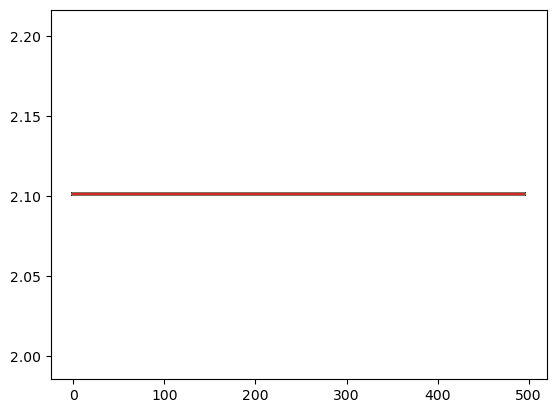

In [2]:
import matplotlib.pyplot as plt

CP2CP = syn_data.where(
    (syn_data.source_pop == 'CP') & 
    (syn_data.target_pop == 'CP'),
    drop=True
)

plt.plot(CP2CP.time, CP2CP.synapse_value)
plt.show()